In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [3]:
#DataFrame manipulation
data = pd.read_json("data/train.json")
data = data.set_index("id")
data = data.sort_values("id")
data.head()

,cuisine,ingredients
id,,
0,spanish,"[mussels, ground black pepper, garlic cloves, ..."
1,mexican,"[tomatoes, diced red onions, paprika, salt, co..."
2,french,"[chicken broth, truffles, pimentos, green pepp..."
3,chinese,"[fresh ginger, sesame oil, frozen peas, cooked..."
4,italian,"[orange peel, cookies, vanilla ice cream, gran..."


In [4]:
data.dtypes

cuisine        object
ingredients    object
dtype: object

In [5]:
data.isnull().sum()

cuisine        0
ingredients    0
dtype: int64

Number of Cuisines : 20
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


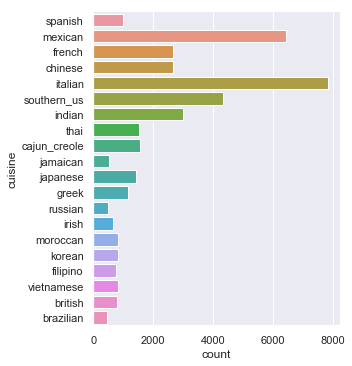

In [6]:
# Cuisines in the Dataset
print("Number of Cuisines :", len(data["cuisine"].unique()))

# Recipes in each cuisine
print(data["cuisine"].value_counts())
sb.catplot(y = "cuisine", data = data, kind = "count")

In [9]:
from collections import Counter
counters = {}
for cuisine in data['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (data['cuisine'] == cuisine)
    for ingredients in data[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [10]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
french,salt,sugar,all-purpose flour,unsalted butter,olive oil,butter,water,large eggs,garlic cloves,ground black pepper
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
thai,fish sauce,garlic,salt,coconut milk,vegetable oil,soy sauce,sugar,water,garlic cloves,fresh lime juice
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves


In [12]:
#Joining ingredients to a single string
data['all_ingredients'] = data['ingredients'].map(";".join)
data.head(1)

,cuisine,ingredients,all_ingredients
id,,,
0,spanish,"[mussels, ground black pepper, garlic cloves, ...",mussels;ground black pepper;garlic cloves;saff...


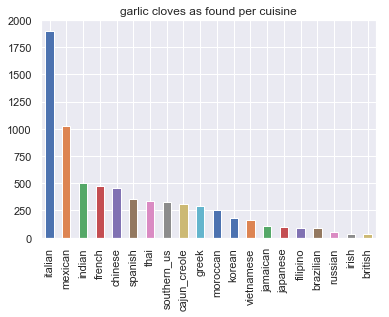

In [13]:
indices = data['all_ingredients'].str.contains('garlic cloves')
data[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='garlic cloves as found per cuisine')

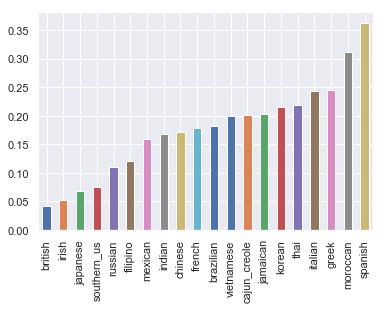

In [18]:
#But since there are many more italian recipes
relative_freq = (data[indices]['cuisine'].value_counts() / data['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='bar')

In [19]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

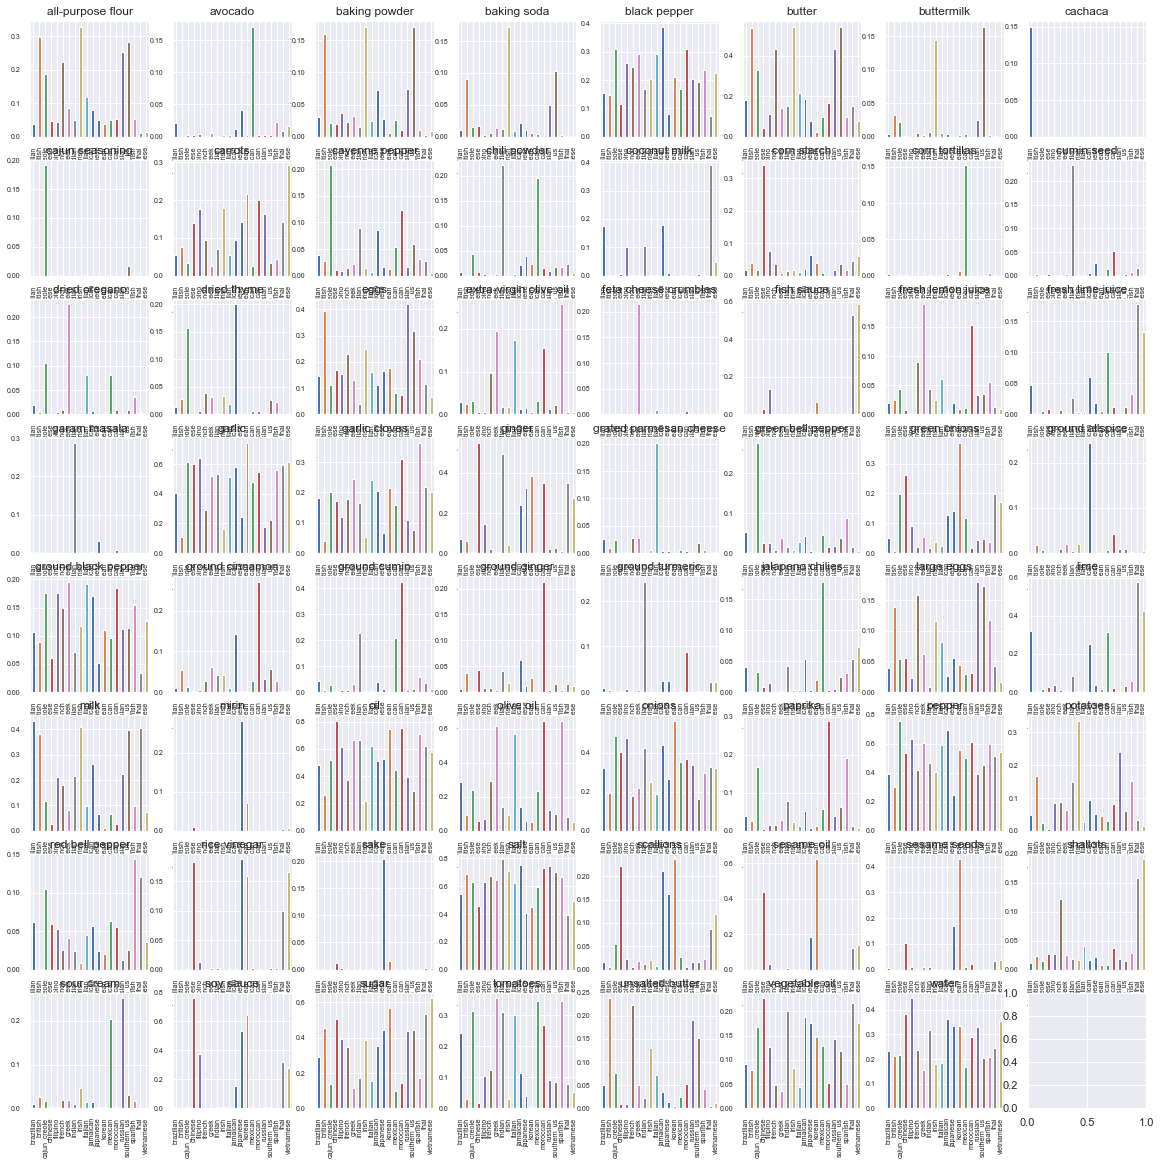

In [20]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = data['all_ingredients'].str.contains(ingredient)
    relative_freq = (data[indices]['cuisine'].value_counts() / data['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)
#Ingredients with high values for single cuisines are more specialised

In [21]:
data.to_csv("data/modified_train.csv")